## Fully de novo

In [39]:
val_auc_list = []
for i in range(10):
    de_novo_net = biophysnn.FinePhysNet(torch.randn_like(specific_pwms) * 0.3, 
                                     seq_len = 600)
    check_point_filename = "checkpoints/denovo_%i.pt" % i
    de_novo_net, train_accs, val_accs, train_aucs, val_aucs = biophysnn.train_model(de_novo_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                           verbose = False, 
                                                           check_point_filename = check_point_filename,
                                                           lr = 0.1) # val auc 0.763
    best_val_auc = np.max(val_aucs)
    print(i,best_val_auc)
    val_auc_list.append(best_val_auc)

0 0.8685930435377847
1 0.8665482581709729
2 0.8629281785120699
3 0.8675784534278486
4 0.8678971794891075
5 0.8699057263409823
6 0.8709894605114854
7 0.8698953447637634
8 0.8638996755098153
9 0.8662437269998693


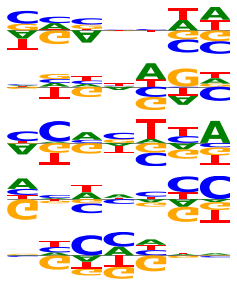

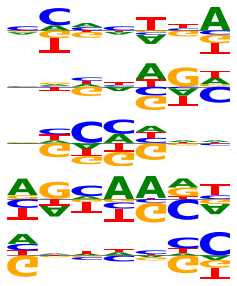

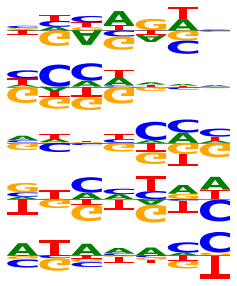

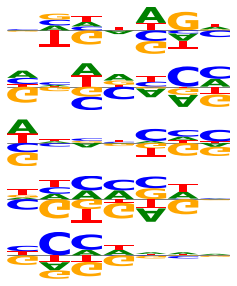

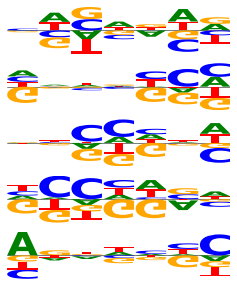

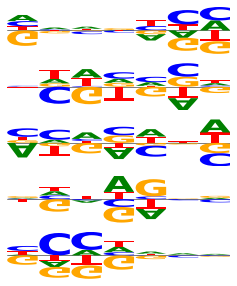

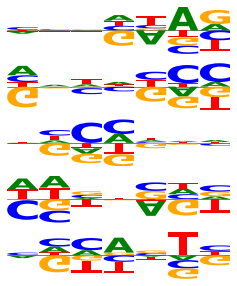

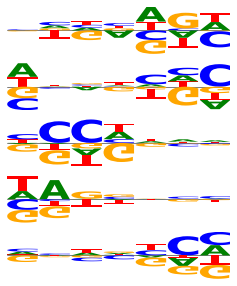

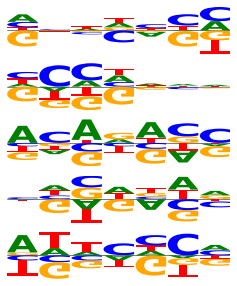

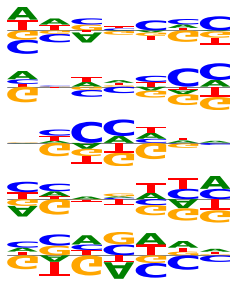

In [40]:
de_novo_net = biophysnn.FinePhysNet(torch.randn_like(specific_pwms),seq_len = 600)
for i in range(10):
    de_novo_net.load_state_dict(torch.load("checkpoints/denovo_%i.pt" % i))
    biophysnn.plot_motifs(de_novo_net.pwm.detach().cpu())

In [34]:
de_novo_net.pwm.mean(1)

tensor([[-1.6867, -1.6306, -1.7937, -1.8710, -1.6432, -1.5257, -1.6178],
        [-1.1227, -0.6703, -1.1111, -1.7953, -3.7895, -3.2095, -2.2036],
        [-1.9084, -2.2960, -1.7665, -2.2983, -1.8849, -2.1001, -1.6355],
        [-1.5222, -2.7695, -2.4268, -1.6714, -1.3523, -1.4006, -1.2399],
        [-2.6282, -1.7598, -1.2725, -0.7998, -2.4116, -1.7248, -1.3009]])

In [35]:
de_novo_net.pwm.std(1)

tensor([[0.7085, 0.4411, 0.3776, 0.5803, 0.5756, 0.3419, 0.5315],
        [0.2358, 0.3120, 0.8605, 1.2800, 3.1410, 2.8710, 2.1452],
        [2.1241, 2.5317, 1.6848, 1.9588, 1.6261, 1.9422, 0.8654],
        [2.7969, 3.3990, 3.2709, 0.7284, 0.4258, 0.3393, 0.1638],
        [3.2379, 1.6315, 0.4323, 0.3602, 2.7720, 1.8287, 0.7235]])

In [16]:
de_novo_net.motif_offset

Parameter containing:
tensor([-2.7468, -2.0183, -2.4517, -1.9290, -1.8008], requires_grad=True)

In [147]:
de_novo_net.offset

Parameter containing:
tensor(-2.6478, requires_grad=True)

In [17]:
de_novo_net.scale

tensor(6.3156)

(25, 3)

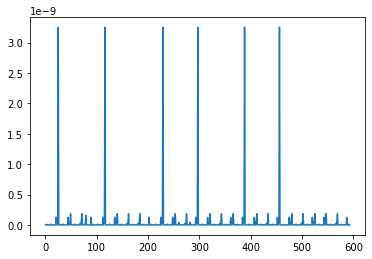

In [22]:
val_dataset = biophysnn.FastBedPeaksDataset(validation_data, genome, de_novo_net.seq_len)
validation_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=10000)
for x,y in validation_dataloader: 
    affin = de_novo_net(x)
    conv_lin = F.conv1d(x, de_novo_net.pwm) + de_novo_net.motif_offset[None,:,None]
    per_position = de_novo_net.scale * conv_lin.logsumexp(1) + de_novo_net.offset
    break

bound = y == 1.
idx = affin[bound].argmax().item()
plt.plot(per_position[bound][idx].detach().exp().numpy())

argmax_pos = per_position[bound][idx].argmax().item()
argmax_motif = conv_lin[bound][idx,:,argmax_pos].argmax().item()
argmax_pos, argmax_motif

In [23]:
conv_lin.logsumexp((0,2))

tensor([1.9340, 7.4762, 5.9430, 9.2793, 8.1886])

In [25]:
argmax_motif

3

## De novo one motif

In [43]:
val_auc_list = []
for i in range(10): 
    check_point_filename = "checkpoints/denovo_1motif_%i.pt" % i
    de_novo1_net = biophysnn.FinePhysNet(torch.randn((1,4,7)) * 0.1, 
                                     seq_len = 600)
    de_novo1_net, train_accs, val_accs, train_aucs, val_aucs = biophysnn.train_model(de_novo1_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                           verbose = False, 
                                                           check_point_filename = check_point_filename,
                                                           lr = 0.1) # val auc 0.763
    best_val_auc = np.max(val_aucs)
    print(i,best_val_auc)
    val_auc_list.append(best_val_auc)

0 0.8505657551492903
1 0.8561197905830223
2 0.8552881016795677
3 0.8557662135175333
4 0.851083661918258
5 0.853555623966241
6 0.8545259622520553
7 0.8554834757643626
8 0.8557647055864178
9 0.8566482675878488


In [42]:
1

1

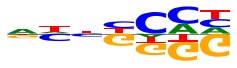

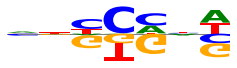

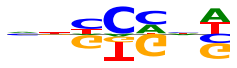

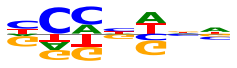

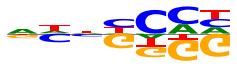

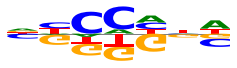

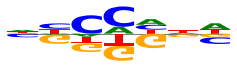

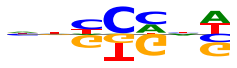

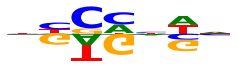

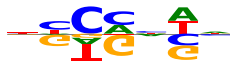

In [44]:
de_novo1_net = biophysnn.FinePhysNet(torch.randn((1,4,7)) * 0.1, 
                             seq_len = 600)
for i in range(10):
    check_point_filename = "checkpoints/denovo_1motif_%i.pt" % i
    de_novo1_net.load_state_dict(torch.load(check_point_filename))
    biophysnn.plot_motifs(de_novo1_net.pwm.detach().cpu())

In [ ]:
de_novo1_net = biophysnn.FinePhysNet(torch.randn((1,4,7)) * 0.1, 
                                 seq_len = 300)
de_novo1_net.load_state_dict(torch.load("checkpoints/denovo_1motif.pt"))
biophysnn.plot_motifs(de_novo1_net.pwm.detach().cpu())

In [29]:
de_novo1_net.motif_offset.data, de_novo1_net.scale.data, de_novo1_net.offset.data

(tensor([-1.0567]), tensor(5.5425), tensor(-2.8165))

<module 'biophysnn' from '/gpfs/commons/home/daknowles/pooledRBPs/biophysical_cnn/biophysnn.py'>

## With annealing

In [77]:
val_auc_list = []
for i in range(10): 
    check_point_filename = "checkpoints/anneal_1motif_%i.pt" % i
    de_novo1_net = biophysnn.FinePhysNet(torch.zeros((1,4,7)), 
                                     seq_len = 600, 
                                     annealing = True)
    de_novo1_net, train_accs, val_accs, train_aucs, val_aucs = biophysnn.train_model(de_novo1_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                           verbose = False, 
                                                           check_point_filename = check_point_filename,
                                                           lr = 0.1) # val auc 0.763
    best_val_auc = np.max(val_aucs)
    print(i,best_val_auc)
    val_auc_list.append(best_val_auc)

1

0.7800840735435486 -8.622151374816895 0.1401272863149643 tensor([-6.5434])
0.8262924688996232
0.8216202259063721 -8.817441940307617 0.13645415008068085 tensor([-6.7903], device='cuda:0')
0.8261680037033825
0.7994122505187988 -8.671150207519531 0.13828051090240479 tensor([-6.6603], device='cuda:0')
0.825952844545468
0.7610723972320557 -8.663009643554688 0.14100995659828186 tensor([-6.4830], device='cuda:0')
0.8255625178473082
0.778719425201416 -8.672532081604004 0.13903144001960754 tensor([-6.5807], device='cuda:0')
0.8251086145254682
0.7452820539474487 -8.649787902832031 0.14181767404079437 tensor([-6.4204], device='cuda:0')
0.827463364699817
0.8254117965698242 -8.925460815429688 0.13528306782245636 tensor([-6.8676], device='cuda:0')
0.8246422998735239
0.7858014702796936 -8.672815322875977 0.139167919754982 tensor([-6.5998], device='cuda:0')
0.8266042841674377
0.7858378887176514 -8.692632675170898 0.13884317874908447 tensor([-6.5854], device='cuda:0')


KeyboardInterrupt: 

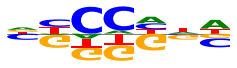

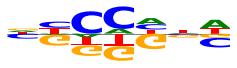

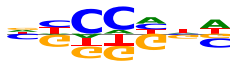

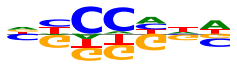

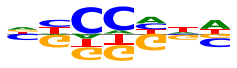

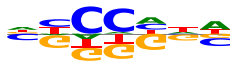

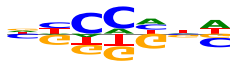

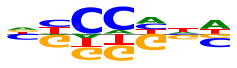

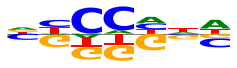

In [63]:
reload(biophysnn)
de_novo1_net = biophysnn.FinePhysNet(torch.randn((1,4,7)) * 0.1, 
                             seq_len = 600, annealing = True)
for i in range(10):
    check_point_filename = "checkpoints/anneal_1motif_%i.pt" % i
    de_novo1_net.load_state_dict(torch.load(check_point_filename))
    biophysnn.plot_motifs(de_novo1_net.pwm.detach().cpu())
    print(de_novo1_net.scale.item(), 
          de_novo1_net.offset.item(), 
          de_novo1_net.inverse_temp.item(), 
          de_novo1_net.motif_offset.data)
    de_novo1_net.inverse_temp_unc.data = torch.tensor(-3.)
    _, _, val_auc = biophysnn.eval_model(de_novo1_net, validation_data, genome)
    print(val_auc)

## Deflation

In [ ]:
val_auc_list = []

for i in range(10):
    de_novo1_net = biophysnn.FinePhysNet(torch.zeros((1,4,7)), 
                                 seq_len = 600, annealing = "fixed")
    check_point_filename = "checkpoints/anneal_1motif_%i.pt" % 0 # always initialize the same
    de_novo1_net.load_state_dict(torch.load(check_point_filename))

    de_novo1_net.inverse_temp_unc.data = torch.tensor(-3.)
    de_novo1_net.motif_offset.data = torch.cat( [ de_novo1_net.motif_offset.data, de_novo1_net.motif_offset.data ] )
    de_novo1_net.pwm.data = torch.cat( [ de_novo1_net.pwm.data, torch.zeros((1,4,7)) ], 0 )

    check_point_filename = "checkpoints/deflate_1_%i.pt" % i
    train_accs, val_accs, train_aucs, val_aucs = biophysnn.train_model(de_novo1_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                           verbose = False, 
                                                           check_point_filename = check_point_filename,
                                                           lr = 0.1)
    best_val_auc = np.max(val_aucs)
    print(i,best_val_auc)
    val_auc_list.append(best_val_auc)

0 0.8609639570745665


In [80]:
val_auc_list

[0.8609639570745665,
 0.8608881497513947,
 0.8622109438548944,
 0.8617966561714483,
 0.8562790492492978,
 0.8564250027984366,
 0.8610128009302664,
 0.8611504642032808,
 0.8565408044152865,
 0.8627855124400838]

tensor(0.1522)
tensor(0.1509)
tensor(0.1522)
tensor(0.1533)
tensor(0.1467)
tensor(0.1482)
tensor(0.1543)
tensor(0.1524)
tensor(0.1476)
tensor(0.1511)


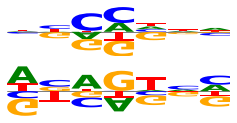

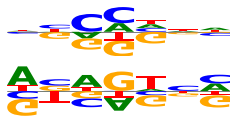

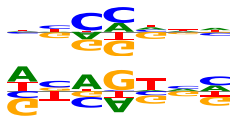

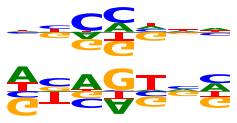

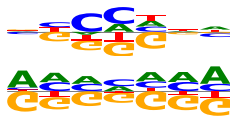

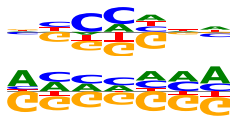

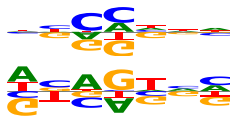

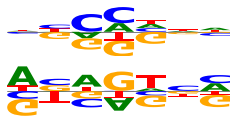

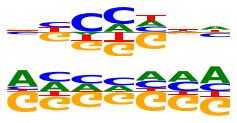

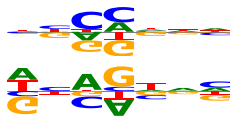

In [82]:
de_novo1_net = biophysnn.FinePhysNet(torch.zeros((2,4,7)), 
                             seq_len = 600, annealing = True)
for i in range(10):
    check_point_filename = "checkpoints/deflate_1_%i.pt" % i
    de_novo1_net.load_state_dict(torch.load(check_point_filename))
    biophysnn.plot_motifs(de_novo1_net.pwm.detach().cpu())
    print(de_novo1_net.inverse_temp.item())

The optimization falls into one of two distinct local optima, one with (A/T)NAGTN(A/C) which gives AUROC around 0.86 and another which rewards A/C runs and penalizes G. 

## Fixed then learned annealing

In [9]:
reload(biophysnn)
val_auc_list = []
annealing_schedule = 10**torch.arange(-3,-0.5,.5) # 0.001 to 0.1 in 4 steps
for i in range(10):
    de_novo1_net = biophysnn.FinePhysNet(torch.zeros((1,4,7)), 
                                 seq_len = 600, annealing = True)
    check_point_filename = "checkpoints/anneal_1motif_%i.pt" % 0 # always initialize the same
    de_novo1_net.load_state_dict(torch.load(check_point_filename))

    de_novo1_net.motif_offset.data = torch.cat( [ de_novo1_net.motif_offset.data, de_novo1_net.motif_offset.data ] )
    de_novo1_net.pwm.data = torch.cat( [ de_novo1_net.pwm.data, torch.zeros((1,4,7)) ], 0 )

    check_point_filename = "checkpoints/deflate_1_%i_fixedanneal.pt" % i
    train_accs, val_accs, train_aucs, val_aucs = biophysnn.train_model(de_novo1_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                                       annealing_schedule = annealing_schedule,
                                                           verbose = False, 
                                                           check_point_filename = check_point_filename,
                                                           lr = 0.1)
    train_accs, val_accs, train_aucs, val_aucs = biophysnn.train_model(de_novo1_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                           verbose = False, 
                                                           check_point_filename = check_point_filename,
                                                           lr = 0.1)
    best_val_auc = np.max(val_aucs)
    print(i,best_val_auc)
    val_auc_list.append(best_val_auc)

1

This does give basically the same secondary motif each time, but it looks pretty weird! Does give better AUC though! 

0.1748240739107132
0.17474083602428436
0.17494630813598633
0.17493586242198944
0.17482402920722961
0.17478249967098236
0.1749017834663391
0.17491328716278076
0.17476391792297363
0.1748443841934204


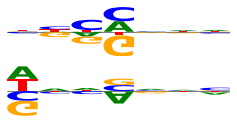

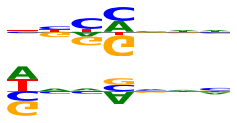

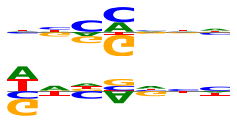

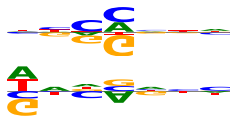

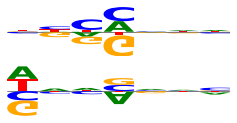

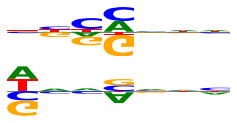

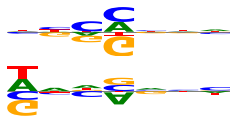

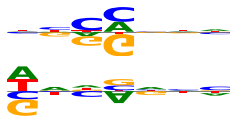

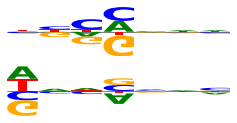

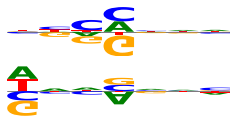

In [11]:
de_novo1_net = biophysnn.FinePhysNet(torch.zeros((2,4,7)), 
                             seq_len = 600, annealing = True)
val_auc_list = []
for i in range(10):
    check_point_filename = "checkpoints/deflate_1_%i_fixedanneal.pt" % i
    de_novo1_net.load_state_dict(torch.load(check_point_filename))
    _,_,val_auc = biophysnn.eval_model(de_novo1_net, 
                validation_data, 
                genome)
    val_auc_list.append(val_auc)
    biophysnn.plot_motifs(de_novo1_net.pwm.detach().cpu())
    print(de_novo1_net.inverse_temp.item())

In [12]:
val_auc_list

[0.865779199921989,
 0.8661822216072159,
 0.865211936841583,
 0.8646190630162941,
 0.8653282000699991,
 0.8666005781624655,
 0.8640742275679726,
 0.8658437532889822,
 0.8660585632277122,
 0.8663116253782104]

1

## Deflation continued

In [ ]:
reload(biophysnn)
val_auc_list = []
annealing_schedule = 10**torch.arange(-3,-0.5,.5) # 0.001 to 0.1 in 4 steps
de_novo1_net = biophysnn.FinePhysNet(torch.zeros((1,4,7)), 
                                 seq_len = 600, annealing = True)
check_point_filename = "checkpoints/anneal_1motif_%i.pt" % 0 # always initialize the same
de_novo1_net.load_state_dict(torch.load(check_point_filename))

prev_checkpoint = "checkpoints/deflation_0.pt"
torch.save(de_novo1_net.state_dict(), prev_checkpoint)

for i in range(1,6):
    
    next_checkpoint = "checkpoints/deflation_%i.pt" % i
    if os.path.isfile(next_checkpoint): 
        prev_checkpoint = next_checkpoint
        continue
    de_novo1_net = biophysnn.FinePhysNet(torch.zeros((i,4,7)), 
                                 seq_len = 600, annealing = True)
    de_novo1_net.load_state_dict(torch.load(prev_checkpoint))
    
    de_novo1_net.motif_offset.data = torch.cat( [ de_novo1_net.motif_offset.data,
                                                 de_novo1_net.motif_offset.data.mean(0,keepdim=True) ] )
    de_novo1_net.pwm.data = torch.cat( [ de_novo1_net.pwm.data, 
                                        torch.zeros((1,4,7)) ], 0 )
    _ = biophysnn.train_model(de_novo1_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                           annealing_schedule = annealing_schedule,
                                                           verbose = False, 
                                                           check_point_filename = next_checkpoint,
                                                           lr = 0.1)
    _, _, _, val_aucs = biophysnn.train_model(de_novo1_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                           verbose = False, 
                                                           check_point_filename = next_checkpoint,
                                                           lr = 0.1)
    best_val_auc = np.max(val_aucs)
    print(i,best_val_auc)
    val_auc_list.append(best_val_auc)
    prev_checkpoint = next_checkpoint

1 0.8681216190465051
2 0.8691135714576443
3 0.8701008007127604
4 0.8717535494116111


In [31]:
    check_point_filename = "checkpoints/deflate_%i.pt" % i
    train_accs, val_accs, train_aucs, val_aucs = biophysnn.train_model(de_novo1_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                           annealing_schedule = annealing_schedule,
                                                           verbose = False, 
                                                           check_point_filename = check_point_filename,
                                                           lr = 0.1)

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 0

In [22]:

for i in range(1,6):
    if i>1: 
        de_novo1_net.motif_offset.data = torch.cat( [ de_novo1_net.motif_offset.data,
                                                     de_novo1_net.motif_offset.data.mean(0,keepdim=True) ] )
    de_novo1_net.pwm.data = torch.cat( [ de_novo1_net.pwm.data, 
                                        torch.zeros((1,4,7), 
                                                    device = de_novo1_net.pwm.data.device) ], 0 )

    check_point_filename = "checkpoints/deflate_%i.pt" % i
    train_accs, val_accs, train_aucs, val_aucs = biophysnn.train_model(de_novo1_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                           annealing_schedule = annealing_schedule,
                                                           verbose = False, 
                                                           check_point_filename = check_point_filename,
                                                           lr = 0.1)
    train_accs, val_accs, train_aucs, val_aucs = biophysnn.train_model(de_novo1_net, 
                                                           train_data, 
                                                           validation_data, 
                                                           genome, 
                                                           verbose = False, 
                                                           check_point_filename = check_point_filename,
                                                           lr = 0.1)
    best_val_auc = np.max(val_aucs)
    print(i,best_val_auc)
    val_auc_list.append(best_val_auc)

RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 0

In [26]:
{ k:v.shape for k,v in de_novo1_net.named_parameters() }

{'pwm': torch.Size([3, 4, 7]),
 'motif_offset': torch.Size([3]),
 'scale_unc': torch.Size([]),
 'offset': torch.Size([]),
 'inverse_temp_unc': torch.Size([])}

In [23]:
de_novo1_net.motif_offset.data.shape

torch.Size([3])

In [25]:
de_novo1_net.pwm.data.shape

torch.Size([3, 4, 7])

In [18]:
de_novo1_net.motif_offset.data.mean(0,keepdim=True).shape

torch.Size([1])

In [ ]:
de_novo1_net = biophysnn.FinePhysNet(torch.zeros((2,4,7)), 
                             seq_len = 600, annealing = True)
val_auc_list = []
for i in range(10):
    check_point_filename = "checkpoints/deflate_%i.pt" % i
    de_novo1_net.load_state_dict(torch.load(check_point_filename))
    _,_,val_auc = biophysnn.eval_model(de_novo1_net, 
                validation_data, 
                genome)
    val_auc_list.append(val_auc)
    biophysnn.plot_motifs(de_novo1_net.pwm.detach().cpu())
    print(de_novo1_net.inverse_temp.item())